In [1]:
import pandas as pd 
# Library which used for data manipulation and analysis.
# Provides data structures like DataFrame and Series, which are efficient for handling structured data.

import numpy as np 
# Library which used for numerical computing in Python.
# Provides support for arrays, matrices, and mathematical functions to operate on these arrays efficiently.

import re #(Regular Expressions):
# Library which used for pattern matching and string manipulation.
# Provides methods for searching, extracting, and replacing patterns in text data.

import matplotlib.pyplot as plt 
# Library which used for data visualization in Python.

import seaborn as sns
# Built on top of matplotlib, seaborn is another data visualization library.
# Offers a high-level interface for creating attractive and informative statistical graphics.

from scipy import stats
# Statsmodels provides a wide range of statistical models, such as linear regression, 
#generalized linear models, time-series analysis, and nonparametric methods

import os
#The "os" library in Python is a standard library used for interacting with the operating system. 
#It provides a way to work with files, directories, and paths, as well as functions for accessing operating 
#system-specific functionality.

# Reading of the dataframe

file_path = 'data/data_science_job.csv'

df = pd.read_csv(file_path,
                 encoding='latin-1') # = encoding='ISO-8859-1'
df.head(5)


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


# Read & Explore the Data

In [2]:
# Providing information about the DataFrame's columns, data types, memory usage, and presence of missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [3]:
pd.set_option('max_colwidth', 100) # This line sets a pandas display option to control the maximum width 
#of the columns when displaying DataFrames.

df.describe(percentiles=[.25, .5, .75], include='all').T #  This line generates a descriptive statistical 
# summary of the DataFrame df. The describe() function computes summary statistics such as count, mean, 
#standard deviation, minimum, maximum, and quartiles for numerical columns by default

,count,unique,top,freq
Company,3197,1106,Publicis Groupe,126
Job Title,3197,2138,Data Engineer,105
Location,3197,1117,"Bengaluru, India",90
Job Type,3197,3,Full Time,3116
Experience level,2962,4,Senior-level,1876
Salary,3009,218,115K+ *,253
Requirment of the company,3198,2600,"Big Data,Business Intelligence,Data analysis,EDA,Excel,Machine Learning",12
Facilities,3198,777,",,,,",542


In [4]:
# Printing and exploring the head of the DataFrame.

print("Data Size:", df.shape[0], 'x', df.shape[1])
df.head()

Data Size: 3198 x 8


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,"


In [5]:
# Exploring unique titles of jobs of the DataFrame.

df['Job Title'].unique

<bound method Series.unique of 0                             Clinical Data Analyst
1                            AML/CFT & Data Analyst
2                         Machine Learning Engineer
3              Application Developer & Data Analyst
4       Data Engineer Full time (Public Sector) USA
                           ...                     
3193          Data Scientist - New College Graduate
3194                             Cloud Data Analyst
3195                     Robotics Engineer, Sensors
3196                                 Data Scientist
3197                           Senior Data Engineer
Name: Job Title, Length: 3198, dtype: object>

In [6]:
#replace ",,,," with NaN

df = df.replace(',,,,', np.nan, regex=True)
df.head(5)

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics",NaN
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",NaN
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning",NaN
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",NaN
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,"


In [7]:
# Exploring all titles of jobs of the DataFrame.

for i in df['Job Title'].unique()[:5]:
    print(i)
print('ect...')    


Clinical Data Analyst
AML/CFT & Data Analyst
Machine Learning Engineer
Application Developer & Data Analyst
Data Engineer Full time (Public Sector) USA
ect...


In [8]:
# Exploring nulls of the DataFrame.

df.isnull().sum()

Company                          1
Job Title                        1
Location                         1
Job Type                         1
Experience level               236
Salary                         189
Requirment of the company       53
Facilities                    1027
dtype: int64

# Preprocessing

In [9]:
# Standartisation of a job title based on the key words dictionary
# We need that as there are a lot of variations of job titles.

key_words = {
    
    'ML Engineer' : [
        'Machine Learning',
        'Deep Learning',
        'Vision',
        'Natural Language Processing',
        'NLP',
        'Text',
        'Linguist',
        'MLOps',
        ' ML '
        ],
    
    'BI Analyst' : [
        'Business Intelligence',
        'PowerBI',
        'Power BI',
        'Business Intel',
        'Looker',
        'Tableau',
        'BI',
        ],
    
    'Software Engineer' : [
        'Software Engineer',
        'HTML',
        'Data Platform',
        'fullstack',
        'Frontend'
        'Backend',
        ],
    
    'AI Engineer' : [
        'Robotics',
        'Artificial Intelligence',
        'ChatGPT',
        'AI'
        ],
    
    'DevOps Engineer' : [
        'DevOps',
        'Operations',
        'Full stack',
        'stack'
        ],
    
    'Data Analyst' : [
        'Data Analyst',
        'Data Analytics',
        'Analyst',
        'Analytics',
        'Visualization',
        ],
    
    'Data Scientist' : [
        'Data Scientist',
        'Scientist',
        'Data Science',
        'Science',
        'Research',
        'Applied'
        ],
    
    'Data Engineer' : [
        'DataOps',
        'Data Engineer',
        'Data Engineering',
        'Data Pipeline',
        'ETL',
        'Data Management',
        'Data Developer',
        'Databricks',
        'Cloud',
        'Bigdata',
        'Big Data'
        ],
    
    'Product Manager' : [
        'Product Manager',
        'Product',
        'PM'
    ],
        
    'Data Manager' : [
        'Data Manager',
        'Data Specialist',
        'Data'
    ]

}


# Creating a function to perform the standartisation
def job_selection(value):
    if type(value) is not str:
        return None
    
    for key in key_words.keys():
        for word in key_words[key]:
            if word.lower() in value.lower():
                return key
    return 'Other'

# Extracting IT specialisation based on key words
df['IT specialisation'] = df['Job Title'].apply(job_selection) 

# Extracting Country and Region names from 'Location' column
df['country'] = df['Location'].apply(lambda x: str(x).split(', ')[-1])
df['Location'] = df['Location'].apply(lambda x: str(x).split(', ')[0])
df = df.replace({'country' : {'United States' : 'USA'}})
df = df.rename(columns = {'Requirment of the company ' : 'Requirment of the company'})

print("Data Size:", df.shape[0], 'x', df.shape[1])

# Removes rows with missing values
df = df.dropna().reset_index(drop=True)

print("Data Size:", df.shape[0], 'x', df.shape[1])
df.head()

Data Size: 3198 x 10
Data Size: 1889 x 10


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,IT specialisation,country
0,Publicis Groupe,Data Engineer Full time (Public Sector) USA,Arlington,Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,",Data Engineer,USA
1,ServiceNow,Sr Staff Data Scientist - ATG,Kirkland,Full Time,Senior-level,184K+,"Computer Science,Deep Learning,Industrial,Machine Learning,NLP,NumPy","401(k) matching,Career development,Competitive pay,Equity,Flex hours",Data Scientist,USA
2,Palo Alto Networks,Principal Cloud Data Engineer (Prisma Access),Santa Clara,Full Time,Senior-level,140K+,"Agile,APIs,AWS,Azure,Big Data,Computer Science","Career development,Medical leave,Salary bonus,Startup environment,",Data Engineer,USA
3,CERN,Data Scientist (TE-CRG-GLO-2023-19-GRAP),Geneva,Full Time,Entry-level,40K+ *,"Computer Science,Data analysis,Deep Learning,Keras,Machine Learning,PhD","Career development,Health care,Medical leave,,",Data Scientist,Switzerland
4,ServiceNow,Staff Data Scientist - ATG,Kirkland,Full Time,Senior-level,159K+,"Computer Science,Deep Learning,Industrial,Machine Learning,NLP,NumPy","401(k) matching,Career development,Competitive pay,Equity,Flex hours",Data Scientist,USA


# Q1

### What are the most common and sought-after job titles within the Data Science domain? 


Text(0.5, 0, 'Count')

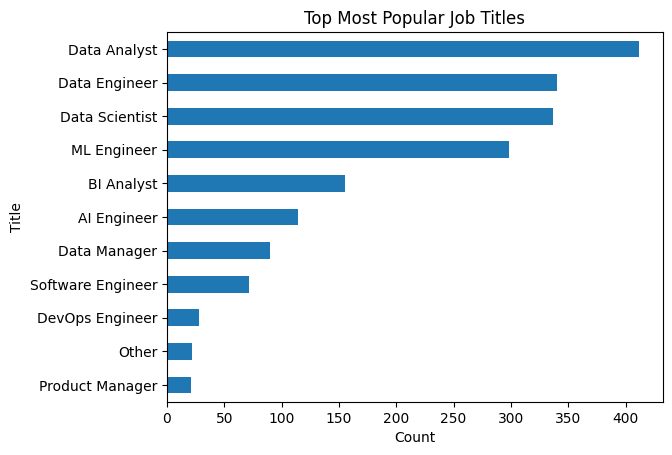

In [10]:
# Grupping job titles for creating a plot
counts = df.groupby(by = 'IT specialisation')['Company'].count().reset_index()
counts.columns = ['IT specialisation', 'N_observations']
counts = counts.sort_values(by = ['N_observations'], ascending=True)

# Creating a plot
counts = counts.set_index('IT specialisation')
counts['N_observations'].plot(kind="barh")
plt.title("Top Most Popular Job Titles")
plt.ylabel("Title")
plt.xlabel("Count")

**NOTE:** The most most common job titles are: *Data Analyst*, *Data Engineer* and *Data Scientist*

# Q2

### How are Data Science job opportunities distributed across different regions and countries? What are the hotspots and emerging markets? 

Text(0.5, 0, 'Count')

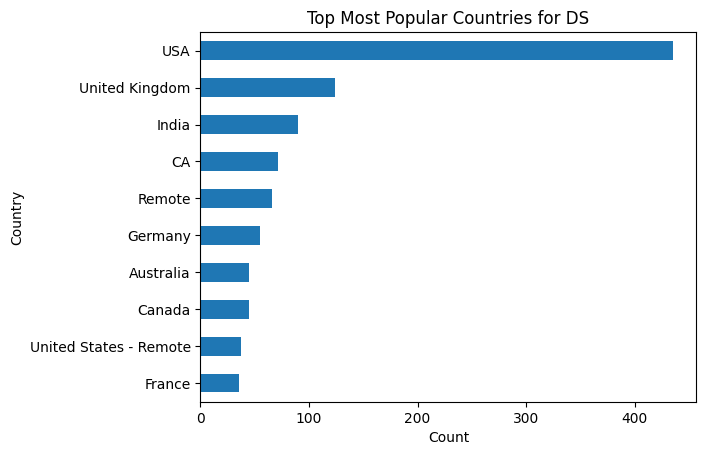

In [11]:
# Grupping countries of companies for creating a plot
counts = df.groupby(by = 'country')['Company'].count().reset_index()
counts.columns = ['country', 'N_observations']
counts = counts.sort_values(by = ['N_observations'], ascending=True)

# Creating a plot
counts = counts.set_index('country').tail(10)
counts['N_observations'].plot(kind="barh")
plt.title("Top Most Popular Countries for DS")
plt.ylabel("Country")
plt.xlabel("Count")

In [12]:
# As we can see on the plot above, the most popular country for IT specialists is the USA. 
# Let's look at the distribution of jobs in the USA only.

usa = df[df['country']=='USA']
counts = usa.groupby(by = ['Location', 'IT specialisation'])['Company'].count().reset_index()
totals = usa.groupby(by = ['Location'])['Company'].count().reset_index()
totals = totals[totals['Location']!='United States']
totals = totals.sort_values(by=['Company'], ascending=True).tail(5)

# Merging rows with the same location
counts = counts.merge(totals, how='inner', on=['Location'])
# Selecting needed columns
counts.columns = ['Location', 'IT specialisation', 'N_jobs', 'Total_Jobs']
# Counting the percentage of each job's amount relative to the total number of jobs to create a distribution.
counts['%'] = np.round(100 * counts['N_jobs'] / counts['Total_Jobs'])

# Sorting Locations by Total_Jobs and IT specialisation by Percentage in ascending order.
counts = counts.sort_values(by = ['Total_Jobs', '%'], ascending = True, ignore_index='True')
counts.head(10)

,Location,IT specialisation,N_jobs,Total_Jobs,%
0,Santa Clara,BI Analyst,1,23,4.0
1,Santa Clara,Data Analyst,1,23,4.0
2,Santa Clara,Data Engineer,1,23,4.0
3,Santa Clara,Software Engineer,1,23,4.0
4,Santa Clara,Data Scientist,2,23,9.0
5,Santa Clara,AI Engineer,5,23,22.0
6,Santa Clara,ML Engineer,12,23,52.0
7,Seattle,AI Engineer,1,25,4.0
8,Seattle,Data Engineer,1,25,4.0
9,Seattle,ML Engineer,1,25,4.0


In [13]:
# Creating a new table for IT specialisations in USA

distributions = counts.pivot(index='Location', columns='IT specialisation', values='N_jobs')
distributions = distributions.fillna(0).reset_index()
distributions

IT specialisation,Location,AI Engineer,BI Analyst,Data Analyst,Data Engineer,Data Manager,Data Scientist,ML Engineer,Product Manager,Software Engineer
0,New York City,0.0,4.0,13.0,11.0,1.0,16.0,6.0,0.0,0.0
1,San Francisco,3.0,4.0,1.0,1.0,1.0,15.0,14.0,0.0,4.0
2,San Mateo,0.0,0.0,2.0,0.0,1.0,9.0,10.0,0.0,4.0
3,Santa Clara,5.0,1.0,1.0,1.0,0.0,2.0,12.0,0.0,1.0
4,Seattle,1.0,10.0,3.0,1.0,0.0,8.0,1.0,1.0,0.0


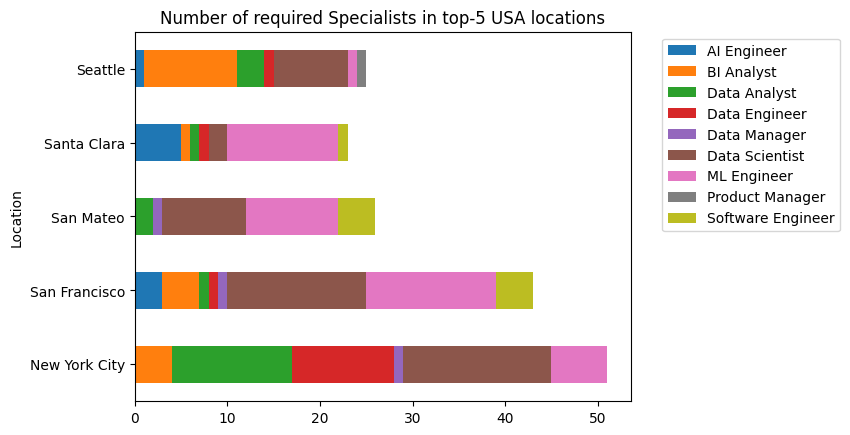

In [14]:
# Creating a plot for distribution of USA IT specialisations.
distributions.plot(x='Location', kind='barh', stacked=True, 
                   title='Number of required Specialists in top-5 USA locations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # bbox_to_anchor is a parameter used in 
# Matplotlib to specify the exact placement of a legend outside the plot area.

plt.show()

**NOTE:** New York and San Francisco are emerging markets for Data Science Specialists. At the same time Seattel is actively looking for BI Analysts

Text(0.5, 0, 'Count')

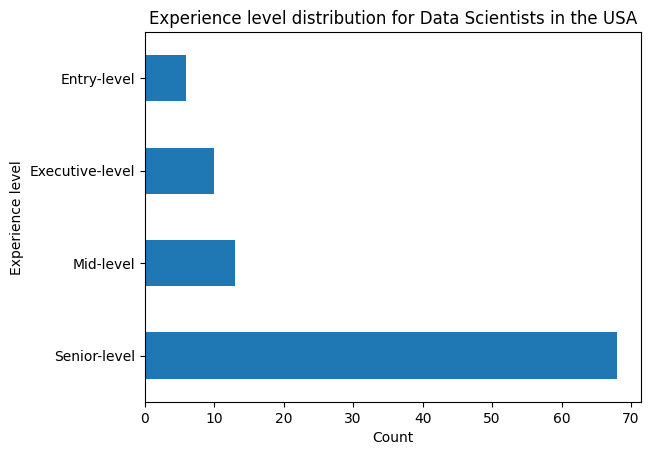

In [15]:
# Preparation of the dataframe for creating a plot 'Experience level distribution for Data Scientists in the USA'
levels = usa[usa['IT specialisation'] == 'Data Scientist']["Experience level"].value_counts()

# Creatinf a plot "Experience level distribution for Data Scientists in the USA".
levels.plot(kind="barh")
plt.title("Experience level distribution for Data Scientists in the USA")
plt.ylabel("Experience level")
plt.xlabel("Count")

**NOTE:** The most demanding Data Scientists in the USA are *Seniors*

# Q3

## Is there a correlation between experience levels and salary ranges within the Data Science field? What are the salary expectations for various career stages?


In [16]:
# Let us print the unique values in the Salary column
# As we can see, the salary column has some non-numeric values that we need to remove in order to transform this column in
# a float (it is currently being considered as an object)
print(df['Salary'].unique())

[' 108K+' ' 184K+' ' 140K+' ' 40K+ *' ' 159K+' ' 97K+' ' 92K+ *'
 ' 115K+ *' ' 44K+ *' ' 129K+ *' ' 105K+ *' ' 110K+ *' ' 62K+ *' ' 73K+ *'
 ' 127K+' ' 60K+' ' 176K+' ' 65K+ *' ' 48K+ *' ' 67K+' ' 104K+' ' 69K+ *'
 ' 105K+' ' 166K+' ' 115K+' ' 43K+' ' 45K+ *' ' 81K+ *' ' 35K+ *'
 ' 39K+ *' ' 130K+' ' 131K+' ' 100K+' ' 52K+' ' 135K+ *' ' 76K+' ' 172K+'
 ' 119K+' ' 125K+' ' 116K+' ' 74K+ *' ' 120K+' ' 51K+ *' ' 149K+' ' 110K+'
 ' 131K+ *' ' 90K+' ' 49K+ *' ' 30K+ *' ' 167K+' ' 236K+' ' 77K+ *'
 ' 179K+' ' 56K+ *' ' 80K+' ' 200K+' ' 139K+' ' 129K+' ' 113K+' ' 59K+ *'
 ' 150K+' ' 158K+' ' 55K+ *' ' 40K+' ' 184K+ *' ' 60K+ *' ' 133K+'
 ' 70K+ *' ' 50K+ *' ' 78K+' ' 36K+ *' ' 122K+ *' ' 81K+' 'EUR 81K'
 ' 190K+' ' 72K+' ' 136K+' ' 102K+ *' ' 89K+ *' ' 156K+' ' 80K+ *'
 ' 107K+' ' 224K+' ' 142K+' 'GBP 35K' ' 164K+' 'EUR 130K+' ' 174K+'
 ' 84K+' ' 79K+' ' 135K+' ' 143K+' ' 170K+' ' 141K+ *' ' 283K+' ' 151K+'
 ' 111K+' ' 51K+' ' 96K+' ' 148K+' ' 204K+' ' 106K+' ' 202K+' ' 295K+'
 ' 68K+' ' 63K+

### Average Salary by Experience Level:

In [17]:
# Define a function to clean the salary values
def clean_salary(salary_str):
    # Remove any non-numeric characters from the string
    cleaned_str = re.sub(r'[^\d.]', '', salary_str)
    # Convert the cleaned string to float
    try:
        return float(cleaned_str)
    except ValueError:
        return None  # Return None for values that cannot be converted

# Apply the clean_salary function to the 'Salary' column
df['Salary'] = df['Salary'].apply(clean_salary)
df['Salary'].head()

0    108.0
1    184.0
2    140.0
3     40.0
4    159.0
Name: Salary, dtype: float64

In [18]:
# Here we are grouping by experience level and calculating mean salary
experience_salary = df.groupby('Experience level')['Salary'].mean()

# Manually defining the order of experience levels for the plot, because the "automatic" order does not make sense
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

# Reindex the experience_salary Series with the desired order we just defined
experience_salary = experience_salary.reindex(experience_order)

# Printing the results
print("Average Salary by Experience Level:")
print(experience_salary)

Average Salary by Experience Level:
Experience level
Entry-level         52.611399
Mid-level           67.758824
Senior-level       112.425079
Executive-level    102.272727
Name: Salary, dtype: float64


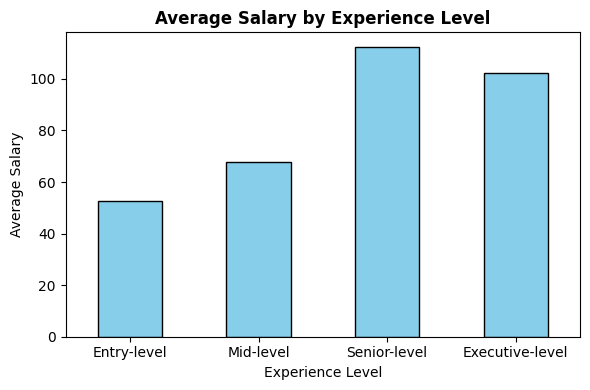

In [19]:
# To visualize the result in a plot
plt.figure(figsize=(6, 4))  # Creating a new figure with specified size
experience_salary.plot(kind='bar', color='skyblue', edgecolor='black')  # Plotting a bar chart 
plt.title('Average Salary by Experience Level', fontweight='bold')  # Adding a title to the plot
plt.xlabel('Experience Level')  # Adding label for the x-axis
plt.ylabel('Average Salary')  # Adding label for the y-axis
plt.xticks(rotation=0, ha='center')  # Setting the rotation and alignment of x-axis labels
plt.tight_layout()  # Adjusting the layout to prevent overlapping elements
plt.show() # Displaying the plot

###  Salary distributions across different experience levels:

In [20]:
# Here we are creating new df by filtering the df by experience level
entry_level_salaries = df[df['Experience level'] == 'Entry-level']['Salary']
mid_level_salaries = df[df['Experience level'] == 'Mid-level']['Salary']
senior_level_salaries = df[df['Experience level'] == 'Senior-level']['Salary']
executive_level_salaries = df[df['Experience level'] == 'Executive-level']['Salary']

# Setting the maximum value for the x-axis range - maximum salary value in our dataset
x_max = max(df['Salary'])  

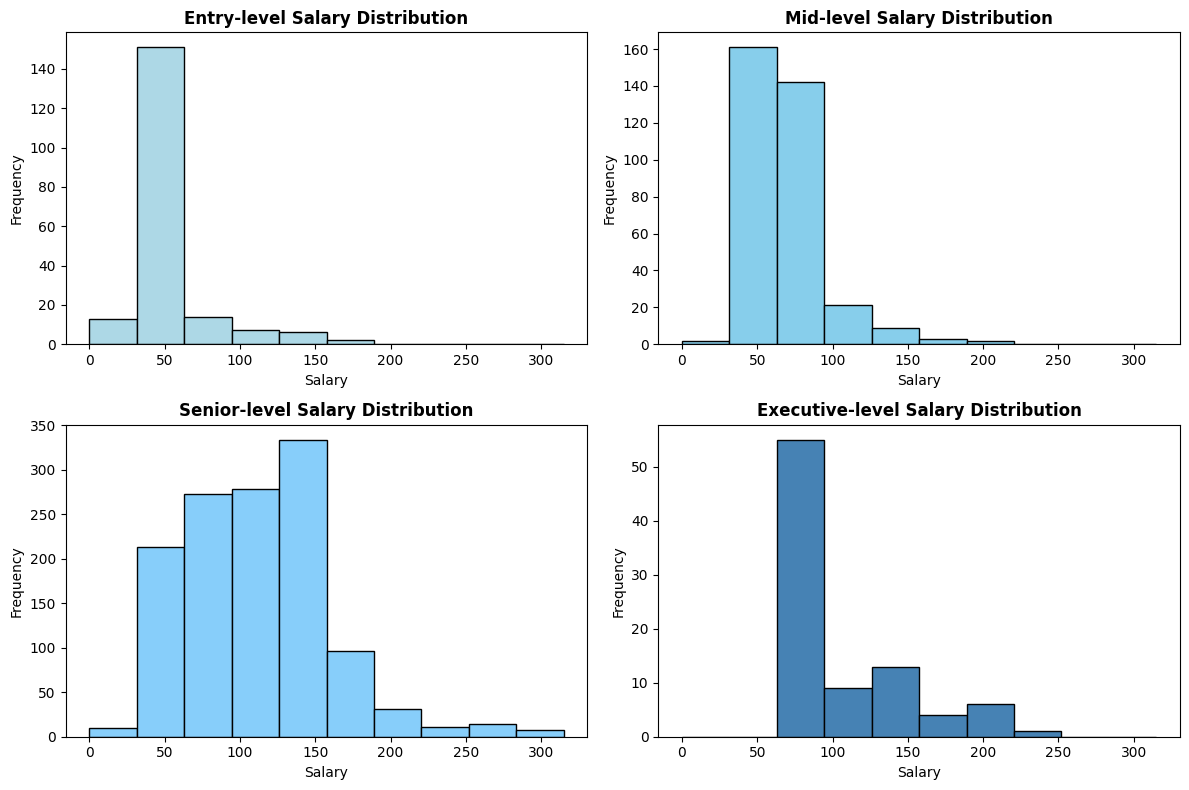

In [21]:
# Plot histograms for each experience level
plt.figure(figsize=(12, 8))  # Creating a new figure with specified size

# Plotting the histogram for entry-level salaries
plt.subplot(2, 2, 1)  # Creating a subplot in a 2x2 grid, position 1
plt.hist(entry_level_salaries, bins=10, range=(0, x_max), color='lightblue', edgecolor='black')  
plt.title('Entry-level Salary Distribution', fontweight='bold')  
plt.xlabel('Salary')
plt.ylabel('Frequency') 

# Plotting the histogram for mid-level salaries
plt.subplot(2, 2, 2)  # Creating a subplot in a 2x2 grid, position 2
plt.hist(mid_level_salaries, bins=10, range=(0, x_max), color='skyblue', edgecolor='black') 
plt.title('Mid-level Salary Distribution', fontweight='bold') 
plt.xlabel('Salary')  
plt.ylabel('Frequency')  

# Plotting the histogram for senior-level salaries
plt.subplot(2, 2, 3)  # Creating a subplot in a 2x2 grid, position 3
plt.hist(senior_level_salaries, bins=10, range=(0, x_max), color='LightSkyBlue', edgecolor='black')  
plt.title('Senior-level Salary Distribution', fontweight='bold') 
plt.xlabel('Salary')  
plt.ylabel('Frequency') 

# Plotting the histogram for executive-level salaries
plt.subplot(2, 2, 4)  # Creating a subplot in a 2x2 grid, position 4
plt.hist(executive_level_salaries, bins=10, range=(0, x_max), color='steelblue', edgecolor='black') 
plt.title('Executive-level Salary Distribution', fontweight='bold') 
plt.xlabel('Salary') 
plt.ylabel('Frequency')  

plt.tight_layout()  # Adjusting the layout to prevent overlapping elements - It helps in improving the appearance of the
#plot by ensuring that all elements are properly spaced and aligned
plt.show() # Displaying the plot

### Career Trajectory:
##### Examining salary trends for specific job roles can help professionals understand the typical career progression within their chosen career path. For example, they can see how salaries evolve as they gain more experience and move from entry-level positions to senior or executive roles.

In [22]:
# Let us print the top 10 most common job titles
top_n = 10
top_job_titles = df['Job Title'].value_counts().head(top_n) # Count the occurrences of each job title
print("Top {} most common job titles are the following:".format(top_n))
print(top_job_titles)

Top 10 most common job titles are the following:
Job Title
Data Engineer                       59
Data Scientist                      50
Data Analyst                        49
Senior Data Engineer                46
Machine Learning Engineer           31
Senior Data Analyst                 31
Senior Data Scientist               29
Senior Machine Learning Engineer    17
Analytics Engineer                  15
Senior Analytics Engineer           11
Name: count, dtype: int64


In [23]:
# Let us analyze the salary trajectories by some of the most common job titles
# Assuming df is your DataFrame containing the dataset

# Manually define the desired order of experience levels
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

# Filter data for each job title

data_engineer = df[df['Job Title'].str.contains('Data Engineer', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Data Engineer", regardless of the case (whether the letters are in uppercase or lowercase)

data_scientist = df[df['Job Title'].str.contains('Data Scientist', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Data Scientist", regardless of the case

data_analyst = df[df['Job Title'].str.contains('Data Analyst', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Data Analyst", regardless of the case

machine_learning_engineer = df[df['Job Title'].str.contains('Machine Learning Engineer', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Machine Learning Engineer", regardless of the case

analytics_engineer = df[df['Job Title'].str.contains('Analytics Engineer', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Analytics Engineer", regardless of the case

data_architect = df[df['Job Title'].str.contains('Data Architect', case=False)] # here we are keeping only the rows where the
#Job Title column contains the string "Data Architect", regardless of the case

# Here we are grouping data by experience level and calculating the mean salary for each job title
data_analyst_salary = data_analyst.groupby('Experience level')['Salary'].mean().reindex(experience_order)
data_engineer_salary = data_engineer.groupby('Experience level')['Salary'].mean().reindex(experience_order)
data_scientist_salary = data_scientist.groupby('Experience level')['Salary'].mean().reindex(experience_order)
ml_engineer_salary = machine_learning_engineer.groupby('Experience level')['Salary'].mean().reindex(experience_order)
analytics_engineer_salary = analytics_engineer.groupby('Experience level')['Salary'].mean().reindex(experience_order)
data_architect_salary = data_architect.groupby('Experience level')['Salary'].mean().reindex(experience_order)

# Plotting the salary trajectories for each job title
plt.figure(figsize=(12, 8))  # Creating a new figure with specified size
plt.show()

<Figure size 1200x800 with 0 Axes>

/tmp/ipykernel_643223/62722951.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Adjusting layout to prevent overlapping elements


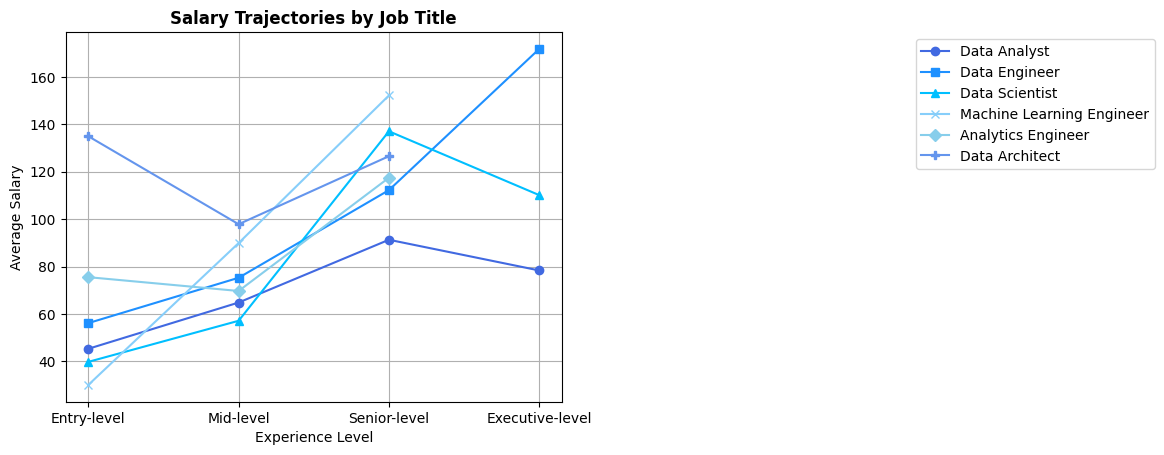

In [24]:
# Plotting salary trajectories for each job title

plt.plot(data_analyst_salary.index, data_analyst_salary.values, marker='o', 
         label='Data Analyst', color='royalblue')

plt.plot(data_engineer_salary.index, data_engineer_salary.values, marker='s', 
         label='Data Engineer', color='dodgerblue')

plt.plot(data_scientist_salary.index, data_scientist_salary.values, marker='^', 
         label='Data Scientist', color='deepskyblue')

plt.plot(ml_engineer_salary.index, ml_engineer_salary.values, marker='x', 
         label='Machine Learning Engineer', color='lightskyblue')

plt.plot(analytics_engineer_salary.index, analytics_engineer_salary.values, marker='D', 
         label='Analytics Engineer', color='skyblue')

plt.plot(data_architect_salary.index, data_architect_salary.values, marker='P', 
         label='Data Architect', color='cornflowerblue')

# Adding title and labels
plt.title('Salary Trajectories by Job Title', fontweight='bold')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.grid(True)  # Adding grid lines to the plot
plt.legend(bbox_to_anchor=(1.7, 1), loc='upper left')  # Adding legend to the plot

plt.tight_layout() # Adjusting layout to prevent overlapping elements
plt.show() # Displaying the plot

# Q4

## What is the prevalence of different job types (full-time, part-time, remote) within Data Science roles? What flexibility do these roles offer?

### Prevalence of full-time/part-time jobs:

In [25]:
# Counting the occurrences of each job type in the Job Type column
job_type_counts = df['Job Type'].value_counts()
# Calculating percentage of each job type
job_type_percentage = (job_type_counts / df['Job Type'].notna().sum()) * 100
# Rounding the percentages to two decimal places
job_type_percentage = job_type_percentage.round(2)
# Print the result
print("The Job Type Distribution in our dataset of Full-time/Part-Time job offerings is the following:")
print(job_type_percentage)


The Job Type Distribution in our dataset of Full-time/Part-Time job offerings is the following:
Job Type
Full Time    99.95
Part Time     0.05
Name: count, dtype: float64


###  Remote opportunities:

In [26]:
# Count occurrences of "remote" and non-remote in the Job Title column
remote_count = df['Job Title'].str.contains(r'\bremote\b', case=False, regex=True).sum()  
non_remote_count = len(df) - remote_count  # Calculating the count of non-remote job titles

# Calculate total number of rows
total_rows = len(df)  # Total number of rows in the DataFrame

# Calculate percentages
remote_percentage = (remote_count / total_rows) * 100  # Percentage of remote job titles
non_remote_percentage = (non_remote_count / total_rows) * 100  # Percentage of non-remote job titles

# Print job type distribution
print("The Job Type Distribution in our dataset of Remote/Non-Remote job offerings is the following:")
print("Remote: {:.2f}".format(remote_percentage))  # Printing percentage of remote job titles with two decimal places
print("Non-Remote: {:.2f}".format(non_remote_percentage))  # Printing percentage of non-remote job titles with two decimal places

The Job Type Distribution in our dataset of Remote/Non-Remote job offerings is the following:
Remote: 4.29
Non-Remote: 95.71


### Percentage of non-remote jobs that offer flex hours:

In [27]:
# Filter the DataFrame for non-remote jobs
non_remote_df = df[df['Job Type'] == 'Full Time']

# Count the occurrences of "flex hours" in the 'Facilities' column for non-remote jobs
flex_hours_count = non_remote_df['Facilities'].str.contains(r'\bflex hours\b', case=False, regex=True).sum()

# Calculate the total number of non-remote jobs
total_non_remote_jobs = len(non_remote_df)

# Calculate the percentage of non-remote jobs offering flex hours
flex_hours_percentage = (flex_hours_count / total_non_remote_jobs) * 100

# Total of non-remote jobs that offer flex hours
total_jobs_non_remote_flex_hours= total_non_remote_jobs*flex_hours_percentage/100

# Print the result
print("Percentage of non-remote jobs offering flex hours: {:.2f}%".format(flex_hours_percentage), 
      "which corresponds to", total_jobs_non_remote_flex_hours, "job offerings in total.")


Percentage of non-remote jobs offering flex hours: 38.56% which corresponds to 728.0 job offerings in total.


# Q5
##  What are the specific skills, qualifications, and prerequisites demanded by companies for Data Science positions? What are the common trends and requirements?

In [28]:
Requirmentofthecompany_string = (df['Requirment of the company'] + ",").sum()
requirements_list = list(set(Requirmentofthecompany_string.split(",")))
requirements_list.remove('')
print('The number of uniques skills required by employers is',len(requirements_list))

The number of uniques skills required by employers is 252


In [29]:
# Create a copy of the DataFrame to avoid modifying the original
dfv01 = df[['IT specialisation', 'Requirment of the company']].copy() 

# Transforms strings with elements into independent rows with singular elements using splitting and pd.explode
dfv01['Requirment of the company'] = dfv01['Requirment of the company'].str.split(',')
dfv01 = dfv01.explode('Requirment of the company', ignore_index=True)
dfv01 = dfv01[dfv01['Requirment of the company']!='']

# Transformation of Requirments to One-Hot-Encoded columns (dummy variables)
dfv01 = pd.concat([dfv01, pd.get_dummies(dfv01['Requirment of the company']).astype(int)], axis=1)

# Counts distributions of Requirments per each Experience level
dfv01 = dfv01.drop(columns=['Requirment of the company']).groupby(by = ['IT specialisation']).sum()
dfv01 = dfv01.T
dfv01['Total'] = dfv01.sum(axis=1)
dfv01 = dfv01.sort_values(by = ['Total'], ascending=False).reset_index()
dfv01.head(10)

IT specialisation,index,AI Engineer,BI Analyst,Data Analyst,Data Engineer,Data Manager,Data Scientist,DevOps Engineer,ML Engineer,Other,Product Manager,Software Engineer,Total
0,Computer Science,62,44,104,121,18,159,10,165,8,4,28,723
1,Engineering,63,29,132,77,27,148,4,147,10,14,25,676
2,AWS,21,38,59,200,26,75,7,110,6,2,29,573
3,Architecture,31,38,52,161,41,38,9,76,3,3,29,481
4,Agile,12,37,57,123,13,45,7,45,3,6,12,360
5,Big Data,15,35,48,95,10,73,6,46,2,3,19,352
6,Data analysis,12,39,130,35,11,70,7,29,3,3,1,340
7,Machine Learning,32,8,14,8,2,125,3,100,7,6,7,312
8,Azure,18,28,24,120,14,35,3,43,5,4,15,309
9,Data Analytics,14,27,102,30,16,35,5,12,0,1,4,246


In [30]:
# Create a copy of the DataFrame to avoid modifying the original
dfv01 = df[['Experience level', 'Requirment of the company']].copy() 

# Transforms strings with elements into independent rows with singular elements using splitting and pd.explode
dfv01['Requirment of the company'] = dfv01['Requirment of the company'].str.split(',')
dfv01 = dfv01.explode('Requirment of the company', ignore_index=True)
dfv01 = dfv01[dfv01['Requirment of the company']!='']

# Transformation of Requirments to One-Hot-Encoded columns (dummy variables)
dfv01 = pd.concat([dfv01, pd.get_dummies(dfv01['Requirment of the company']).astype(int)], axis=1)

# Counts distributions of Requirments per each Experience level
dfv01 = dfv01.drop(columns=['Requirment of the company']).groupby(by = ['Experience level']).sum()
dfv01 = dfv01.T
dfv01['Total'] = dfv01.sum(axis=1)
dfv01 = dfv01.sort_values(by = ['Total'], ascending=False).reset_index()

/tmp/ipykernel_643223/393914978.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dfv01.head(20), y='index', x='Total', palette=custom_palette)
/tmp/ipykernel_643223/393914978.py:7: UserWarning: The palette list has more values (40) than needed (20), which may not be intended.
  ax = sns.barplot(data=dfv01.head(20), y='index', x='Total', palette=custom_palette)


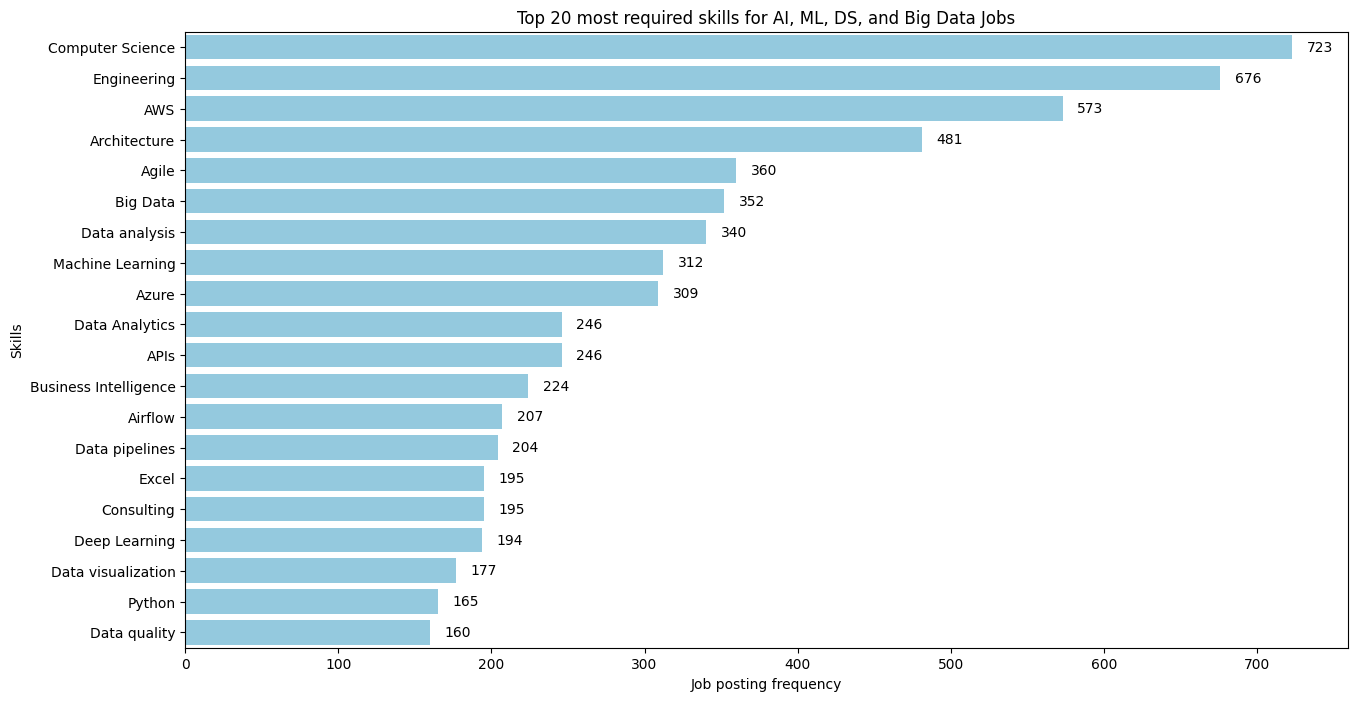

In [31]:
# Define a custom color palette from sky blue to green
custom_palette = sns.color_palette(["#87CEEB"] * 20 + ["#2E8B57"] * 20)

fig, ax = plt.subplots(figsize=(15, 8))

# Create the barplot with the defined colors
ax = sns.barplot(data=dfv01.head(20), y='index', x='Total', palette=custom_palette)

# Set the title and labels
ax.set_title("Top 20 most required skills for AI, ML, DS, and Big Data Jobs")
plt.xlabel('Job posting frequency')
plt.ylabel('Skills')

# Add data labels to the bars outside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(20, 0),
                textcoords='offset points')

plt.show()

### Top 20 skills for AI, ML,DS and Big Data Jobs are:
**1. Computer Science:**
The study of algorithms, data structures, and the principles of computing. It covers a broad range of topics, including software engineering, artificial intelligence, and database systems.

**2. Engineering:**
The application of scientific and mathematical principles to design, build, and maintain structures, machines, devices, systems, materials, and processes.

**3. AWS (Amazon Web Services):**
A comprehensive, evolving cloud computing platform provided by Amazon. It offers a mix of infrastructure as a service (IaaS), platform as a service (PaaS), and packaged software as a service (SaaS) offerings.

**4. Architecture:**
Architectural skills involve designing scalable, robust, and secure systems to handle complex data pipelines and workflows.

**5. Agile:**
A methodology used in project management and software development that promotes adaptive planning, evolutionary development, early delivery, and continual improvement.

**6. Big Data:**
Refers to extremely large datasets that can be analyzed computationally to reveal patterns, trends, and associations, especially relating to human behavior and interactions.

**7. Data Analysis:**
The process of inspecting, cleansing, transforming, and modeling data to discover useful information, draw conclusions, and support decision-making.

**8. Machine Learning:**
A subset of artificial intelligence that focuses on the development of algorithms that enable computers to learn from and make predictions or decisions based on data.

**9. Azure:**
A cloud computing service created by Microsoft for building, testing, deploying, and managing applications and services through Microsoft-managed data centers.

**10. Business Intelligence:**
Technologies, applications, and practices for the collection, integration, analysis, and presentation of business information.

**11. Data Analytics:**
The science of analyzing raw data to draw conclusions about that information. It involves applying statistical, computational, and operational tools to data to extract insights and information.

**12. APIs (Application Programming Interfaces):**
A set of rules and protocols that allows different software entities to communicate with each other. APIs are used to enable the integration of different software systems.

**13. R:**
A programming language and free software environment for statistical computing and graphics. R is widely used for data analysis and statistical modeling.

**14. Excel:**
A spreadsheet program developed by Microsoft. It features calculation, graphing tools, pivot tables, and a macro programming language called Visual Basic for Applications.

**15. Data Pipelines:**
A set of data processing elements connected in series, where the output of one element is the input of the next. It is used to process large datasets and involves tasks like data ingestion, transformation, and storage.

**16. Consulting:**
The practice of providing expert advice to organizations on how to improve their business performance and operations.

**17. Airflow:**
A platform created by the Apache Software Foundation that allows users to programmatically author, schedule, and monitor workflows. It is used for data engineering and data integration tasks.

**18. Deep Learning:**
A subset of machine learning that uses neural networks with many layers (deep neural networks) to analyze various factors of data. It is particularly effective for complex tasks like image and speech recognition.

**19. Data Visualization:**
The representation of information and data through visual means, like charts, graphs, and infographics, to communicate information clearly and efficiently.

**20. Python:**
A high-level, interpreted programming language known for its readability and versatility. Python is widely used in data science, machine learning, web development, and more.

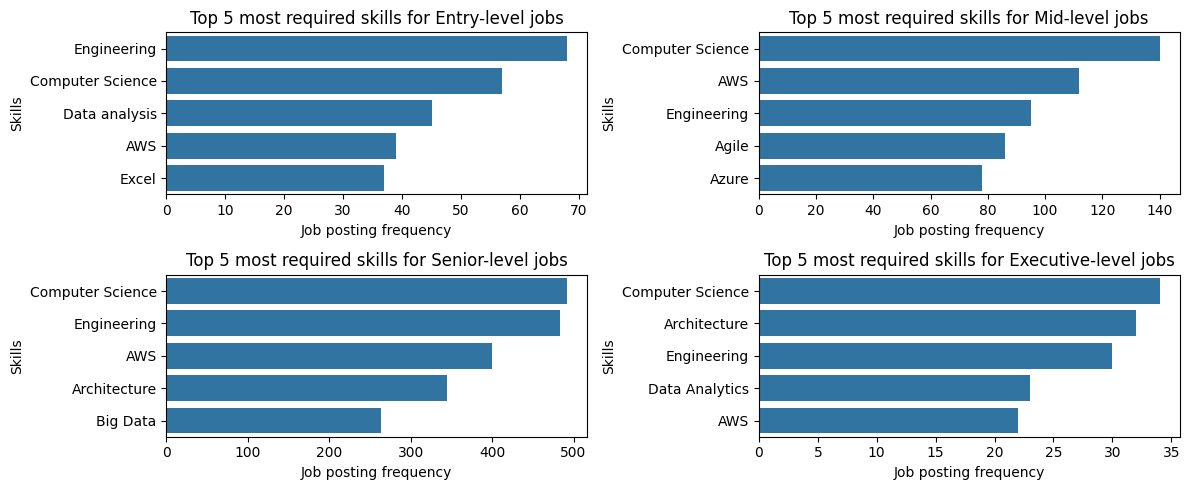

In [32]:
# Create a plot with top 5 most mentioned skills in vacancies, griuped by experience level

#define a fuction to create a bar plot, depending on a filter in data frame
def plot_top_skills(df, level, ax):
    # Filter dfv01 for the desired experience level
    df_filtered = df[['index', level]]

    # Create df_skills using melt on the filtered DataFrame
    df_skills = df_filtered.sort_values(by = [level], ascending=False).head()

    # Plot using Seaborn barplot
    sns.barplot(data=df_skills, y='index', x=level, ax=ax).set(title=f"Top 5 most required skills for {level} jobs")
    ax.set_xlabel('Job posting frequency')
    ax.set_ylabel('Skills')

# List of experience levels
experience_levels = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))  # Create the figure and axis with 2 rows and 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, level in enumerate(experience_levels):
    plot_top_skills(dfv01, level, axes[i])

plt.tight_layout()
plt.show()

## Question 6. What additional benefits, perks, and facilities are offered by companies hiring in Data Science? 

In [33]:
#create a set of unique facilities:

facilitiesofthecompany_string = (df['Facilities'] + ",").sum()
facilities_list = list(set(facilitiesofthecompany_string.split(",")))
facilities_list.remove('')
print('The number of unique facilities employers are offering is',len(facilities_list))

The number of unique facilities employers are offering is 34


In [34]:
dfv02 = df[['Location', 'Facilities']].copy()

# Transforms strings with elements into independent rows with singular elements using splitting and pd.explode
dfv02['Facilities'] = dfv02['Facilities'].str.split(',')
df_facilities = dfv02.explode('Facilities', ignore_index=True)
df_facilities = df_facilities[df_facilities['Facilities']!='']

df_facilities = df_facilities.groupby(by = ['Facilities']).count()
df_facilities.columns = ['count']
df_facilities = df_facilities.sort_values(by = ['count'], ascending=False).reset_index()
df_facilities.head()

,Facilities,count
0,Career development,1561
1,Health care,851
2,Flex hours,729
3,Equity,638
4,Competitive pay,585


/tmp/ipykernel_643223/715438288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_facilities.head(20), y='Facilities' ,x='count', palette=custom_palette)
/tmp/ipykernel_643223/715438288.py:5: UserWarning: The palette list has more values (40) than needed (20), which may not be intended.
  ax=sns.barplot(data=df_facilities.head(20), y='Facilities' ,x='count', palette=custom_palette)


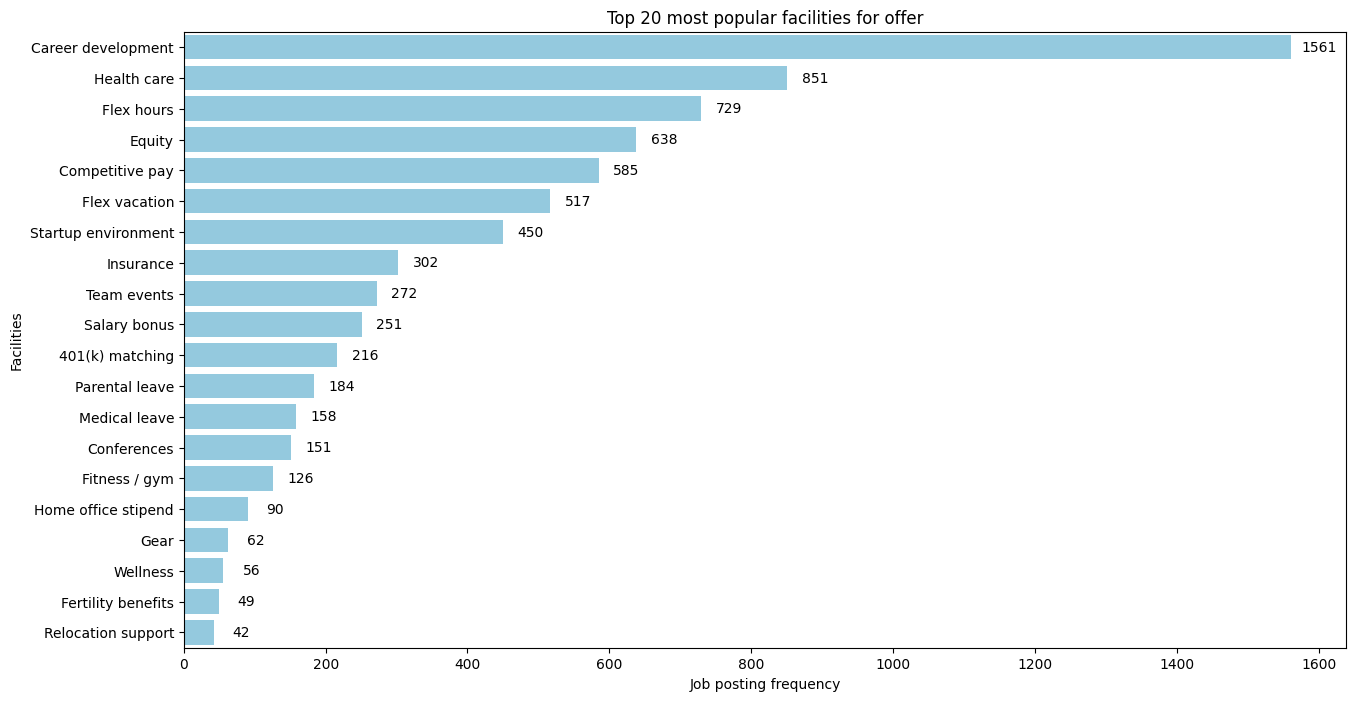

In [35]:
# Create a plot with top 20 most mentioned skills in vacancies
fig, ax = plt.subplots(figsize=(15,8)) # Adjusted the figure size for better visualization

# Create the barplot
ax=sns.barplot(data=df_facilities.head(20), y='Facilities' ,x='count', palette=custom_palette)

# Set the title and labels
ax.set(title="Top 20 most popular facilities for offer")
plt.xlabel('Job posting frequency')
plt.ylabel('Facilities')

# Add data labels to the bars outside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(20, 0),  # Adjusted the position to place the labels outside the bars
                textcoords='offset points')

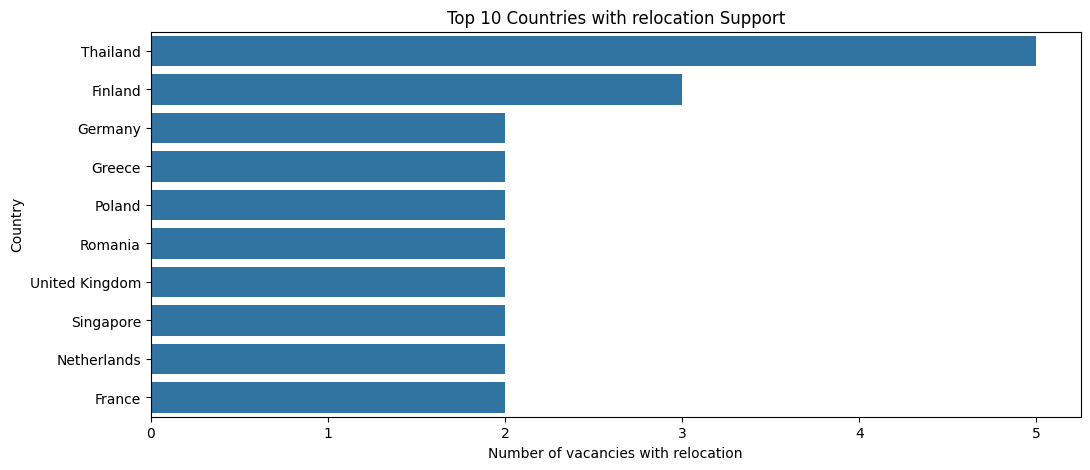

In [36]:
# Replace 'Amsterdam' with 'Netherlands' in the 'country' column
df['country'].replace('Amsterdam', 'Netherlands', inplace=True)

# Replace 'Paris or Remote from France' with 'France' in the 'country' column
df['country'].replace('Paris or Remote from France', 'France', inplace=True)

dfv03 = df[['country', 'Facilities']].copy()

# Transforms strings with elements into independent rows with singular elements using splitting and pd.explode
dfv03['Facilities'] = dfv03['Facilities'].str.split(',')
df_facilities = dfv03.explode('Facilities', ignore_index=True)
df_facilities = df_facilities[df_facilities['Facilities']=='Relocation support']

df_facilities = df_facilities.groupby(by = ['country']).count()
df_facilities.columns = ['count']
df_facilities = df_facilities.sort_values(by = ['count'], ascending=False).reset_index()

# Sort and select top 10 locations based on 'Relocation support'

# Plot using Seaborn barplot
plt.figure(figsize=(12, 5))
sns.barplot(data=df_facilities.head(10), x='count', y='country')
plt.title('Top 10 Countries with relocation Support')
plt.xlabel('Number of vacancies with relocation')
plt.ylabel('Country')
plt.show()